In [1]:
# Импортируем модули и библиотеки

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

In [ ]:
# Делим наш датасэт на обучающую и тестовую выборку

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [8]:
# Предварительная обработка данных

In [9]:
# Посмотрим как выглядят изображения

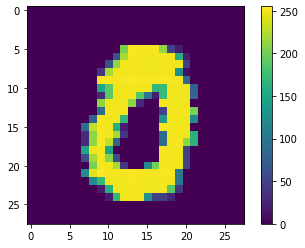

In [11]:
plt.figure()
plt.imshow(x_train[69])
plt.colorbar()
plt.grid(False)

In [12]:
# Нормализация данных

In [13]:
x_train = x_train / 255
x_test = x_test / 255

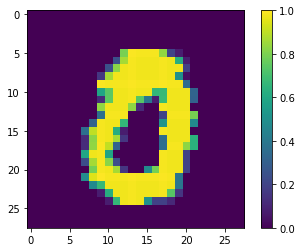

In [14]:
plt.figure()
plt.imshow(x_train[69])
plt.colorbar()
plt.grid(False)

In [15]:
# Посмотрим несколько изображений

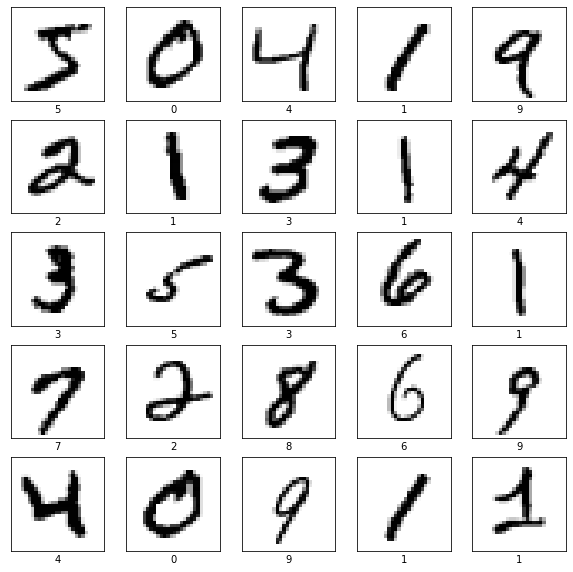

In [18]:
plt.figure(figsize = (10,10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [19]:
# Создание модели нейронной сети

In [21]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [22]:
# Компиляция модели

In [28]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Обучение модели

In [32]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6402 - accuracy: 0.8367
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.9050
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.9173
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2647 - accuracy: 0.9250
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2421 - accuracy: 0.9323
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2232 - accuracy: 0.9373
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2075 - accuracy: 0.9417
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1940 - accuracy: 0.9451
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1822 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.171

In [33]:
# Проверка точности предсказания

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1690 - accuracy: 0.9515
Test accuracy:  0.9514999985694885


In [35]:
# Предсказания

In [36]:
predictions = model.predict(x_train)

In [43]:
pred_num = 5

In [44]:
predictions[pred_num]

array([1.9016652e-04, 2.9613407e-06, 9.8368591e-01, 3.3200206e-03,
       1.3155734e-05, 4.6692934e-04, 1.3720590e-05, 1.2622516e-04,
       1.1151863e-02, 1.0289521e-03], dtype=float32)

In [45]:
np.argmax(predictions[pred_num])

2

In [46]:
y_train[pred_num]

2

In [47]:
class_names[np.argmax(predictions[pred_num])]

'2'

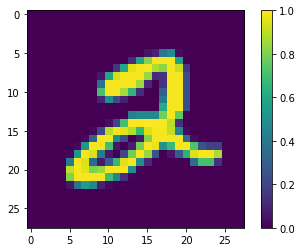

In [48]:
plt.figure()
plt.imshow(x_train[pred_num])
plt.colorbar()
plt.grid(False)